In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

X_raw = df['clean_comment']
y_raw = df['category'].map({-1: 2, 0: 0, 1: 1})  # remap labels for multi-class

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000
tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance on training set
# -----------------------------
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define base learners with tuned parameters
# -----------------------------
lightgbm_model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

svm_model = SVC(
    C=1.13,
    kernel='linear',
    probability=True,  # required for stacking
    random_state=42
)

# -----------------------------
# 6️⃣ Define meta-learner
# -----------------------------
meta_learner = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 7️⃣ Stacking Classifier
# -----------------------------
stacking_model = StackingClassifier(
    estimators=[
        ('lightgbm', lightgbm_model),
        ('xgboost', xgb_model),
        ('svm', svm_model)
    ],
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1  # Avoid parallel issues with SVM
)

# -----------------------------
# 8️⃣ Train stacking model
# -----------------------------
stacking_model.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 9️⃣ Predict and evaluate
# -----------------------------
y_pred = stacking_model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


c:\Users\apoor\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.402793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170580
[LightGBM] [Info] Number of data points in the train set: 36914, number of used features: 5446
[LightGBM] [Info] Start training from score -1.161819
[LightGBM] [Info] Start training from score -1.073625
[LightGBM] [Info] Start training from score -1.063295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

c:\Users\apoor\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.237358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135355
[LightGBM] [Info] Number of data points in the train set: 29531, number of used features: 4531
[LightGBM] [Info] Start training from score -1.161790
[LightGBM] [Info] Start training from score -1.073598
[LightGBM] [Info] Start training from score -1.063347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

c:\Users\apoor\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\apoor\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2529
           1       0.90      0.86      0.88      3154
           2       0.79      0.76      0.78      1650

    accuracy                           0.87      7333
   macro avg       0.86      0.86      0.86      7333
weighted avg       0.87      0.87      0.87      7333



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

X_raw = df['clean_comment']
y_raw = df['category'].map({-1: 2, 0: 0, 1: 1})  # remap labels

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000
tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance on training set
# -----------------------------
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define base learner (LightGBM)
# -----------------------------
lightgbm_model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

# -----------------------------
# 6️⃣ Define meta-learner (Logistic Regression)
# -----------------------------
meta_learner = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 7️⃣ Stacking Classifier
# -----------------------------
stacking_model_1 = StackingClassifier(
    estimators=[
        ('lightgbm', lightgbm_model)
    ],
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1
)

# -----------------------------
# 8️⃣ Train stacking model
# -----------------------------
stacking_model_1.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 9️⃣ Predict and evaluate
# -----------------------------
y_pred = stacking_model_1.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.299394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170580
[LightGBM] [Info] Number of data points in the train set: 36914, number of used features: 5446
[LightGBM] [Info] Start training from score -1.161819
[LightGBM] [Info] Start training from score -1.073625
[LightGBM] [Info] Start training from score -1.063295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

X_raw = df['clean_comment']
y_raw = df['category'].map({-1: 2, 0: 0, 1: 1})  # remap labels

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000
tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance on training set
# -----------------------------
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define base learner (Logistic Regression)
# -----------------------------
base_lr = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Define meta-learner (LightGBM)
# -----------------------------
meta_lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

# -----------------------------
# 7️⃣ Stacking Classifier
# -----------------------------
stacking_model_2 = StackingClassifier(
    estimators=[
        ('logistic', base_lr)
    ],
    final_estimator=meta_lgbm,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1
)

# -----------------------------
# 8️⃣ Train stacking model
# -----------------------------
stacking_model_2.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 9️⃣ Predict and evaluate
# -----------------------------
y_pred = stacking_model_2.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 36914, number of used features: 3
[LightGBM] [Info] Start training from score -1.161819
[LightGBM] [Info] Start training from score -1.073625
[LightGBM] [Info] Start training from score -1.063295
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2529
           1       0.91      0.86      0.89      3154
           2       0.73      0.80      0.76      1650

    accuracy                           0.86      7333
   macro avg       0.84      0.85      0.84      7333
weighted avg       0.86      0.86      0.86      7333



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

# Remap class labels: -1 → 2, 0 → 0, 1 → 1
df['category'] = df['category'].map({-1: 2, 0: 0, 1: 1})

X_raw = df['clean_comment']
y_raw = df['category']

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)  # Trigrams
max_features = 7000   # Can adjust as needed

tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance with SMOTE (training set only)
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define Logistic Regression model
# -----------------------------
model = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Train the model
# -----------------------------
model.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 7️⃣ Predict and evaluate
# -----------------------------
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0,1,2]))


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2529
           1       0.92      0.86      0.89      3154
           2       0.81      0.78      0.80      1650

    accuracy                           0.88      7333
   macro avg       0.87      0.87      0.86      7333
weighted avg       0.88      0.88      0.87      7333



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1️⃣ Load dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

X_raw = df['clean_comment']
y_raw = df['category'].map({-1: 2, 0: 0, 1: 1})  # remap labels

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=7000)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance with SMOTE
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define base learner (Logistic Regression)
# -----------------------------
base_lr = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Define meta-learner (LightGBM)
# -----------------------------
meta_lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

# -----------------------------
# 7️⃣ Stacking Classifier
# -----------------------------
stacking_model_3 = StackingClassifier(
    estimators=[('logistic', base_lr)],
    final_estimator=meta_lgbm,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1
)

# -----------------------------
# 8️⃣ Train stacking model
# -----------------------------
stacking_model_3.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 9️⃣ Predict and evaluate
# -----------------------------
y_pred = stacking_model_3.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 37848, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2529
           1       0.91      0.86      0.89      3154
           2       0.73      0.79      0.76      1650

    accuracy                           0.86      7333
   macro avg       0.84      0.85      0.84      7333
weighted avg       0.86      0.86      0.86      7333



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

# Map labels: -1 → 2, 0 → 0, 1 → 1
df['category'] = df['category'].map({-1: 2, 0: 0, 1: 1})

X_raw = df['clean_comment']
y_raw = df['category']

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000

tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance using SMOTE (training set only)
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define Logistic Regression with class weights
# -----------------------------
model = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    class_weight='balanced',  # <-- add class weights
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Train the model
# -----------------------------
model.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 7️⃣ Predict and evaluate
# -----------------------------
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2529
           1       0.92      0.86      0.89      3154
           2       0.81      0.78      0.80      1650

    accuracy                           0.88      7333
   macro avg       0.87      0.87      0.86      7333
weighted avg       0.88      0.88      0.87      7333



Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2529
           1       0.92      0.86      0.89      3154
           2       0.81      0.78      0.80      1650

    accuracy                           0.88      7333
   macro avg       0.87      0.87      0.86      7333
weighted avg       0.88      0.88      0.87      7333



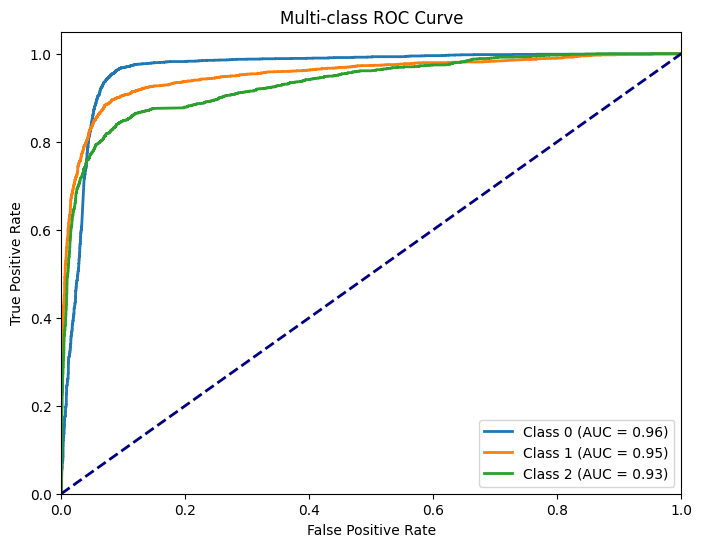

Macro AUC: 0.9490
Weighted AUC: 0.9514


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

# Map labels: -1 → 2, 0 → 0, 1 → 1
df['category'] = df['category'].map({-1: 2, 0: 0, 1: 1})

X_raw = df['clean_comment']
y_raw = df['category']

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000

tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance using SMOTE (training set only)
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define Logistic Regression with class weights
# -----------------------------
model = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Train the model
# -----------------------------
model.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 7️⃣ Predict and evaluate
# -----------------------------
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0,1,2]))

# -----------------------------
# 8️⃣ ROC and AUC for multi-class
# -----------------------------
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = model.predict_proba(X_test_tfidf)

n_classes = y_test_bin.shape[1]

# Plot ROC curves
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Compute macro and weighted AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average='macro')
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted')
print(f"Macro AUC: {macro_auc:.4f}")
print(f"Weighted AUC: {weighted_auc:.4f}")
